In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import time
from scipy import stats
from scipy.optimize import leastsq
import scipy.optimize as opt
from scipy.stats import norm, poisson
# from scipy.interpolate import BarycentricInterpolator, CubicSpline

import math
#import seaborn

### Compute $\pi$

In [5]:
def compute_pi():
    return np.sqrt(6 * np.sum(1 / np.arange(1, 100000, dtype=np.float) ** 2))
compute_pi()

3.1415831042309486

## Use Taylor Expansion to Compute exponential function

In [15]:
def calc_e_small(x):
    n = 10    
    #start= time.clock()     #  start timing
    
    f = np.arange(1, n+1).cumprod()
    b = np.array([x]*n).cumprod()
    result = np.sum(b / f) + 1
    return result 

calc_e_small(10)


12842.305114638448

- $exp(x)$ will be hard to compute using above method when x is big. 
- $ a= int(x/ln2 + 0.5) $
- $ x = ln2 * x/ln2 = ln2 * a + (x -ln2*a) $
- $ y = 2^a + calc_e_small(x - a*ln2) $

In [27]:
def calc_e(x):
    reverse = False
    if x < 0:   # handle negative numbers
        x = -x
        reverse = True
    ln2 = 0.69314718055994530941723212145818
    c = x / ln2
    a = int(c+0.5)
    b = x - a*ln2
    y = (2 ** a) * calc_e_small(b)
    if reverse:
        return 1/y
    return y

calc_e(10)

22026.465794806085

### Application of Taylor Expansion - Exponetial fuction
- Compute simulated values with true values

In [25]:
    t1 = np.linspace(-2, 0, 10, endpoint=False)
    t2 = np.linspace(0, 3, 20)
    t = np.concatenate((t1, t2))
    print(t)     # number on axis
    y = np.empty_like(t)
    for i, x in enumerate(t):
        y[i] = calc_e(x)
        print ('e^', x, ' = ', y[i], '(approx.)\t', math.exp(x), '(true)')
        # print 'Error：', y[i] - math.exp(x)

[-2.         -1.8        -1.6        -1.4        -1.2        -1.         -0.8
 -0.6        -0.4        -0.2         0.          0.15789474  0.31578947
  0.47368421  0.63157895  0.78947368  0.94736842  1.10526316  1.26315789
  1.42105263  1.57894737  1.73684211  1.89473684  2.05263158  2.21052632
  2.36842105  2.52631579  2.68421053  2.84210526  3.        ]
e^ -2.0  =  0.135335283237 (approx.)	 0.1353352832366127 (true)
e^ -1.8  =  0.165298888222 (approx.)	 0.16529888822158653 (true)
e^ -1.6  =  0.201896517995 (approx.)	 0.20189651799465538 (true)
e^ -1.4  =  0.246596963942 (approx.)	 0.2465969639416065 (true)
e^ -1.2  =  0.301194211912 (approx.)	 0.30119421191220214 (true)
e^ -1.0  =  0.367879441171 (approx.)	 0.36787944117144233 (true)
e^ -0.8  =  0.449328964117 (approx.)	 0.4493289641172217 (true)
e^ -0.6  =  0.548811636094 (approx.)	 0.5488116360940265 (true)
e^ -0.4  =  0.670320046036 (approx.)	 0.6703200460356393 (true)
e^ -0.2  =  0.818730753078 (approx.)	 0.8187307530779819 (tru

/Users/qiaolinchen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


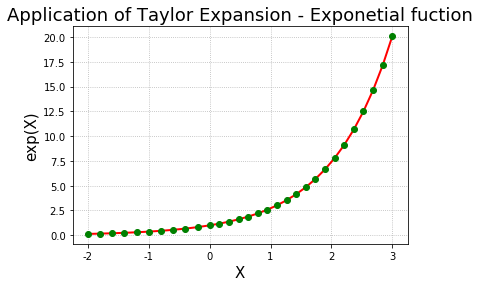

In [26]:
    plt.figure(facecolor='w')
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.plot(t, y, 'r-', t, y, 'go', linewidth=2)
    plt.title(u'Application of Taylor Expansion - Exponetial fuction', fontsize=18)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('exp(X)', fontsize=15)
    plt.grid(True, ls=':')
    plt.show()

## Use Taylor Expansion to Compute sin() function

In [29]:
def calc_sin_small(x):
    x2 = -x ** 2
    t = x
    f = 1
    sum = 0
    for i in range(10):
        sum += t / f
        t *= x2
        f *= ((2*i+2)*(2*i+3))
    return sum

# Use the periodicity of sin(x)
def calc_sin(x):
    a = x / (2*np.pi)
    k = np.floor(a)
    a = x - k*2*np.pi
    return calc_sin_small(a)

In [32]:
    t = np.linspace(-2*np.pi, 2*np.pi, 100, endpoint=False)
    print (t)     # 横轴数据
    y = np.empty_like(t)
    for i, x in enumerate(t):
        y[i] = calc_sin(x)
        print ('sin(', x, ') = ', y[i], '(Approx)\t', math.sin(x), '(True)' )
        # print ('误差：', y[i] - math.exp(x))


[ -6.28318531e+00  -6.15752160e+00  -6.03185789e+00  -5.90619419e+00
  -5.78053048e+00  -5.65486678e+00  -5.52920307e+00  -5.40353936e+00
  -5.27787566e+00  -5.15221195e+00  -5.02654825e+00  -4.90088454e+00
  -4.77522083e+00  -4.64955713e+00  -4.52389342e+00  -4.39822972e+00
  -4.27256601e+00  -4.14690230e+00  -4.02123860e+00  -3.89557489e+00
  -3.76991118e+00  -3.64424748e+00  -3.51858377e+00  -3.39292007e+00
  -3.26725636e+00  -3.14159265e+00  -3.01592895e+00  -2.89026524e+00
  -2.76460154e+00  -2.63893783e+00  -2.51327412e+00  -2.38761042e+00
  -2.26194671e+00  -2.13628300e+00  -2.01061930e+00  -1.88495559e+00
  -1.75929189e+00  -1.63362818e+00  -1.50796447e+00  -1.38230077e+00
  -1.25663706e+00  -1.13097336e+00  -1.00530965e+00  -8.79645943e-01
  -7.53982237e-01  -6.28318531e-01  -5.02654825e-01  -3.76991118e-01
  -2.51327412e-01  -1.25663706e-01   8.88178420e-16   1.25663706e-01
   2.51327412e-01   3.76991118e-01   5.02654825e-01   6.28318531e-01
   7.53982237e-01   8.79645943e-01

/Users/qiaolinchen/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


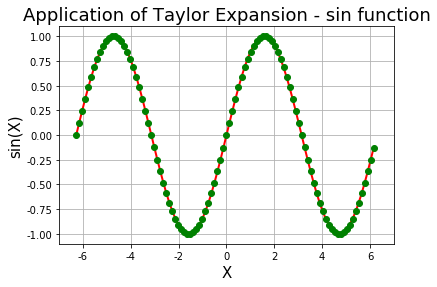

In [33]:
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.plot(t, y, 'r-', t, y, 'go', linewidth=2)
    plt.title(u'Application of Taylor Expansion - sin function', fontsize=18)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('sin(X)', fontsize=15)
    plt.xlim((-7, 7))
    plt.ylim((-1.1, 1.1))
    plt.grid(True)
    plt.show()